In [136]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [137]:
#Model Variables and Parameters
x=[1,2]
# X= Type of Line. x=1 for underground distribution lines and x=2 for overhead distribution lines
age_average_x=20
# Current average ages in year for underground and overhead distribution lines (in years)
length_average_x=25
# Circuit length in mile for underground and overhead transission and distribution lines
i= 13
# Numbers showing different circuit in network (Shrewsbury has 191.5 miles overhead, 121.7 miles underground line and eaach circuit is about 25 miles)


In [138]:
shape_age_x=age_average_x/(age_average_x/2)**2
#Shape of Gamma distribution required for simulating liene circuits ages
print(shape_age_x)

0.2


In [139]:
scale_age_x=(age_average_x/2)**2/age_average_x
#scale of Gamma distribution required for simulating line circuits ages
print(scale_age_x)

5.0


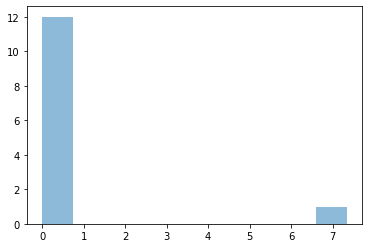

In [140]:
random_ages=np.random.gamma(shape_age_x,scale_age_x,i)
plt.hist(np.random.gamma(shape_age_x,scale_age_x,i),alpha=0.5)
plt.show()
#Randomly determined circuit's ages in the base year (2021)
### I guess these numbers are not correct because I do not expect to see such circuit's ages from a gamma distribution with an average age 20.

In [141]:
i=random_ages.copy()
print (i)

[3.79595183e-02 5.16004409e-03 1.93680596e-02 5.77658456e+00
 1.87503536e+00 2.45841950e-01 1.12035138e-02 1.98647386e+00
 8.89842109e+00 6.37212742e-05 1.45646682e-01 4.44001352e-01
 7.60647721e-04]


In [120]:
#age_2021_i=(scale_age_x)*(1/math.gamma(shape_age_x))*(1**((shape_age_x)-1))
#for z in range (1,15):
    #age_2021_i=(age_2021_i)*(math.exp(-z))
    #print (age_2021_i)
#Randomly determined circuit's ages in the base year (2021)
### I thought above numbers are not correct so I exactly write the paper's equation (which is Gamma distribution formula) but again the produced numbers are not what I expected.

0.40066648338511135
0.054224312012341624
0.0026996695293588385
4.944617221865544e-05
3.331656877169526e-07
8.258351736189405e-10
7.530642013436946e-13
2.5262489596206213e-16
3.117638891809589e-20
1.4154058671294646e-24
2.3639685289554522e-29
1.4524724638487204e-34
3.283066222867489e-40
2.729963851033192e-46


In [37]:
class Circuit:
    def __init__(self, length, age):
        self.length=length
        self.age=age
    
circuit_1=Circuit(25,20)
circuit_2=Circuit(24,21)
circuit_3=Circuit(22,22)
circuit_4=Circuit(18,18)
circuit_5=Circuit(25,30)
circuit_6=Circuit(36,19)
circuit_7=Circuit(31,29)
circuit_8=Circuit(29,27)
circuit_9=Circuit(25,24)
circuit_10=Circuit(27,26)